You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/7-Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 



## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Time series with Pandas in Python

In this section we are going to learn how to handle time series data in Python:

Basic topics to be covered:

* datetime module
* numpy datetime arrays
* pandas datetime
* pandas datareader
    1. Resampling
    2. Time shifting (leads and lags)
    3. Rolling windows and Expanding windows
   

#### datetime module

In [1]:
from datetime import datetime

In [2]:
year =2021
month= 1
day =1

In [3]:
my_date = datetime(year, month, day)
my_date

datetime.datetime(2021, 1, 1, 0, 0)

In [4]:
# we can extract any information from our datetime object. 
my_date.month

1

In [5]:
my_date.isoweekday()
# Monday == 1 ... Sunday == 7 so 5 means Friday

5

In [6]:
datetime.today()

datetime.datetime(2024, 9, 11, 15, 25, 11, 519411)

#### Numpy datetime arrays
NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.


In [8]:
import numpy as np

In [9]:
# creating datetime array
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64')

array(['2020-01-20', '2021-01-20'], dtype='datetime64[D]')

In [10]:
np.array(['2020-01-20', '2021-01-20'], dtype='datetime64[Y]')

array(['2020', '2021'], dtype='datetime64[Y]')

In [11]:
# np.arange(start, stop, step)
np.arange('2021-01-01', '2021-01-10', dtype='datetime64[D]')

array(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
       '2021-01-09'], dtype='datetime64[D]')

In [12]:
# available dtypes are: D, h, m, s, ms, W, M, Y and etc. 
np.arange('2023-01-10', datetime.today(), dtype='datetime64[D]')

array(['2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
       '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
       '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
       '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
       '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
       '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
       '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
       '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
       '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
       '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
       '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
       '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
       '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
       '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06',
       '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
       '2023-03-11', '2023-03-12', '2023-03-13', '2023-

#### Pandas datetime
Usually we will work with time series as a datetime index in pandas dataframes. pandas has a lot of built in functions and methods to work with time series!

In [13]:
import pandas as pd

In [14]:
pd.date_range(start='2023-01-01', end='2023-01-20', freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# let's creat an index first. For example the first week of 2021
index = pd.date_range('2023-01-01', periods=7, freq='B')
index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='B')

here is a list of frequency parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [16]:
# if you want to create an index for specific days, there are two ways to do that:
custom_index = pd.to_datetime(['2021-01-06', '2021-01-21'])
custom_index

DatetimeIndex(['2021-01-06', '2021-01-21'], dtype='datetime64[ns]', freq=None)

In [17]:
# or alternatively, we could pass a numpy array to pd.DatetimeIndex()
custom_index = pd.DatetimeIndex(np.array(['2021-01-01', '2021-01-19']))
custom_index 

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

Now let's explore some of pandas datetime functions:

In [18]:
# creating a time series data frame
# pd.DateFrame( data, index, column names)
df = pd.DataFrame(data=['first day of the year', 'first day of school'],index= custom_index, columns= ['Event'])
df

,Event
2021-01-01,first day of the year
2021-01-19,first day of school


In [19]:
df.columns

Index(['Event'], dtype='object')

In [20]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-19'], dtype='datetime64[ns]', freq=None)

In [21]:
df.index.max()

Timestamp('2021-01-19 00:00:00')

In [22]:
df.index.argmax()

1

#### Pandas datareader

In [24]:
#import pandas_datareader.data as web

In [38]:
start = pd.to_datetime('2021-01-01')
end   = pd.to_datetime('today')
end

Timestamp('2024-09-11 15:28:12.586724')

In [34]:
Ticker =  "TSLA AAPL".split(" ")
Ticker

['TSLA', 'AAPL']

In [27]:
#Stocks = web.DataReader(name= Ticker, data_source= 'yahoo', start=start, end= end)
#Stocks.tail()

In [280]:
# if pandas_datareader didn't work, try yfinance. On Google colab, run the following:
# !pip install yfinance

# On your local computer, simply install yfinance package using pip install yfinance. 

#### Yahoo Finance

In [35]:
import yfinance as yf

In [36]:
start

Timestamp('2021-01-01 00:00:00')

In [39]:
end

Timestamp('2024-09-11 15:28:12.586724')

In [40]:
Stocks = yf.download(Ticker, start, end)
Stocks.tail()

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker            AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2024-09-04  220.850006  219.410004  220.850006  219.410004  221.779999   
2024-09-05  222.380005  230.169998  222.380005  230.169998  225.479996   
2024-09-06  220.820007  210.729996  220.820007  210.729996  225.240005   
2024-09-09  220.910004  216.270004  220.910004  216.270004  221.270004   
2024-09-10  220.110001  226.169998  220.110001  226.169998  221.479996   

Price                          Low                    Open              \
Ticker            TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2024-09-04  222.220001  217.479996  210.570007  221.660004  210.589996   
2024-09-05  235.000000  221.520004  222.250000  221.630005  223.490005   
2024-09-06  233.600006  219.770004  210.509995  223.949997  232.600006   
2024-09-09  219.869995  216.710007  213.669998  220.820007  216.199997   
2024-09-10  226.399994  216.729996  218.639999  218.919998  220.070007   

Price         Volume             
Ticker          AAPL       TSLA  
Date                             
2024-09-04  43840200   80651800  
2024-09-05  36615400  119355000  
2024-09-06  48423000  112177000  
2024-09-09  67180000   67443500  
2024-09-10  51591000   78891100

In [41]:
df= round(Stocks['Adj Close'],2)
df.tail()

Ticker,AAPL,TSLA
Date,,
2024-09-04,220.85,219.41
2024-09-05,222.38,230.17
2024-09-06,220.82,210.73
2024-09-09,220.91,216.27
2024-09-10,220.11,226.17


In [42]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30',
               '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06',
               '2024-09-09', '2024-09-10'],
              dtype='datetime64[ns]', name='Date', length=927, freq=None)

In [43]:
import matplotlib.pyplot as plt

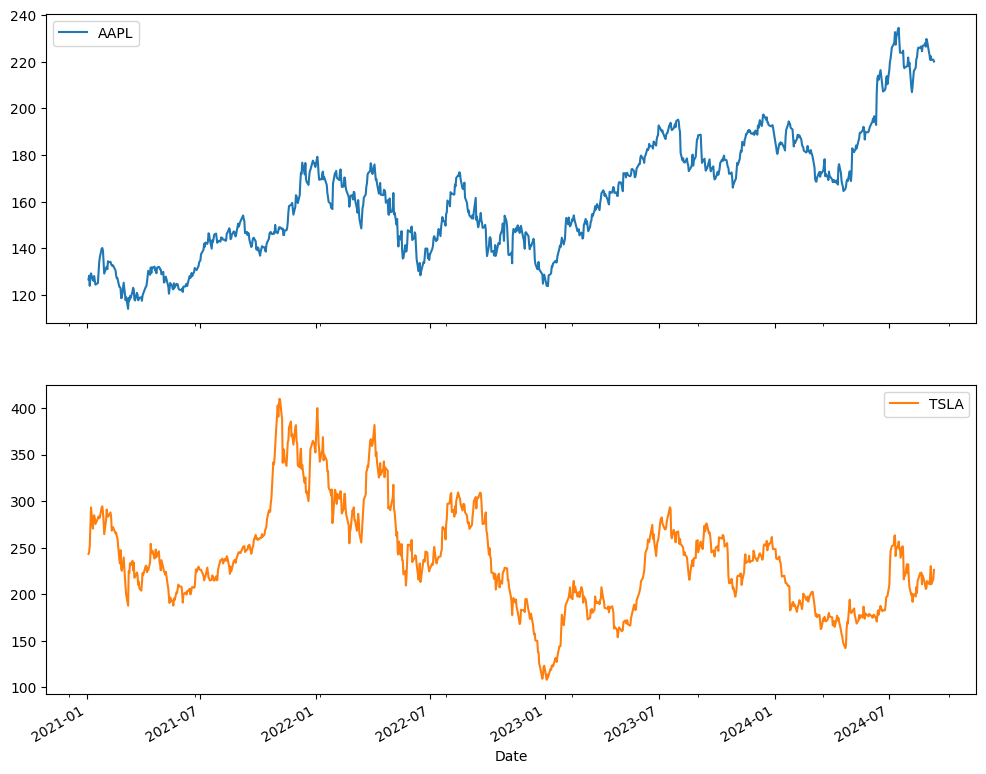

In [44]:
df.plot(subplots=True, figsize=(12,10))
plt.show()

In [45]:
df.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30',
               '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06',
               '2024-09-09', '2024-09-10'],
              dtype='datetime64[ns]', name='Date', length=927, freq=None)

#### 1.Resampling
Resampling data by different rules (frequencies). Here is the list of frequencies: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [46]:
# example: resampling data by month end frequency
df.resample(rule='M').mean()

Ticker,AAPL,TSLA
Date,,
2021-01-31,130.233684,276.258947
2021-02-28,128.911579,264.757368
2021-03-31,119.483043,218.934348
2021-04-30,129.228095,236.539048
2021-05-31,124.465000,205.584000
2021-06-30,127.627273,208.973636
2021-07-31,142.536190,219.711905
2021-08-31,145.697727,235.080455
2021-09-30,145.864762,251.317143


you can resample based on custom resampling functions as well

**example 1: plot the normalized monthly average price.**

In [49]:
df.resample(rule='M').mean().apply(lambda x: x/x[0])

Ticker,AAPL,TSLA
Date,,
2021-01-31,1.000000,1.000000
2021-02-28,0.989848,0.958367
2021-03-31,0.917451,0.792497
2021-04-30,0.992279,0.856222
2021-05-31,0.955705,0.744171
2021-06-30,0.979987,0.756441
2021-07-31,1.094465,0.795311
2021-08-31,1.118741,0.850942
2021-09-30,1.120023,0.909716


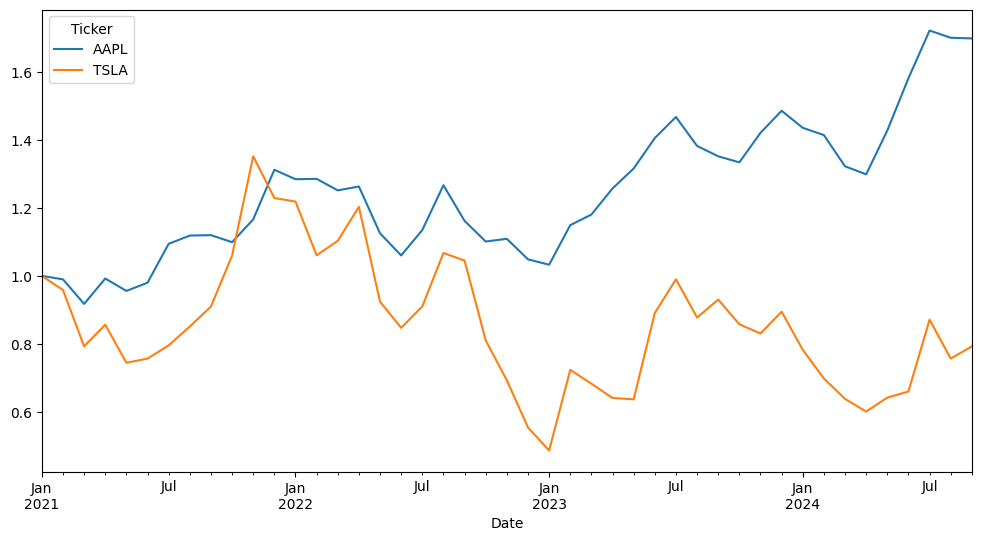

In [50]:
df.resample(rule='M').mean().apply(lambda x: x/x[0]).plot(figsize=(12,6))
plt.show()

In [51]:
# example 2: draw a barplot comparing monthly returns between Tesla and Apple

df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1)

Ticker,AAPL,TSLA
Date,,
2021-01-31,0.019735,0.087355
2021-02-28,-0.094661,-0.195649
2021-03-31,-0.044061,-0.070319
2021-04-30,0.068745,0.072083
2021-05-31,-0.058258,-0.087122
2021-06-30,0.102007,0.089436
2021-07-31,0.062532,0.013719
2021-08-31,0.044923,0.036693
2021-09-30,-0.072200,0.056355


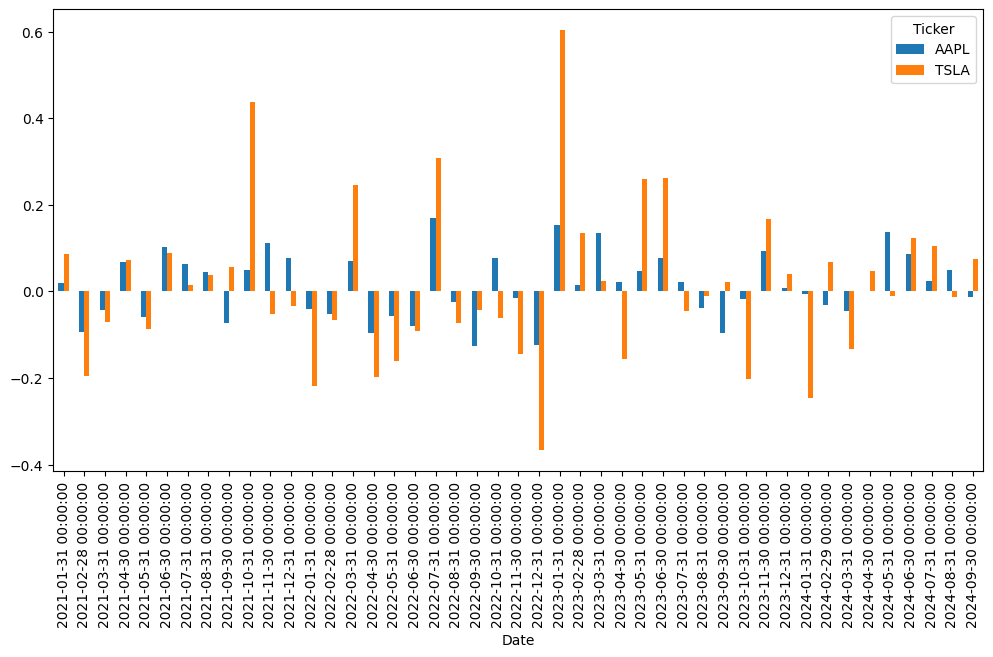

In [52]:
df.resample(rule='M').apply(lambda x : x[-1]/x[0]-1).plot.bar(figsize=(12,6))
plt.show()

#### 2. Time shifting (leads and lags)


In [53]:
# shift forward
df_apple= pd.DataFrame(df['AAPL'])
df_apple.head()

,AAPL
Date,
2021-01-04,126.68
2021-01-05,128.25
2021-01-06,123.93
2021-01-07,128.16
2021-01-08,129.27


In [54]:
df_apple['lag(t-1)']= df_apple['AAPL'].shift(1)
df_apple['lead(t+1)']= df_apple['AAPL'].shift(-1)

df_apple.head()

,AAPL,lag(t-1),lead(t+1)
Date,,,
2021-01-04,126.68,NaN,128.25
2021-01-05,128.25,126.68,123.93
2021-01-06,123.93,128.25,128.16
2021-01-07,128.16,123.93,129.27
2021-01-08,129.27,128.16,126.26


#### 3. Rolling windows and Expanding windows

Let's construct a 30 day simple moving averages for Tesla!

In [55]:
df.head()

Ticker,AAPL,TSLA
Date,,
2021-01-04,126.68,243.26
2021-01-05,128.25,245.04
2021-01-06,123.93,251.99
2021-01-07,128.16,272.01
2021-01-08,129.27,293.34


In [56]:
df.rolling(window=5).mean().head()

Ticker,AAPL,TSLA
Date,,
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
2021-01-08,127.258,261.128


In [57]:
df['TSLA_MA(30)']=df['TSLA'].rolling(30).mean()

In [58]:
df.head()

Ticker,AAPL,TSLA,TSLA_MA(30)
Date,,,
2021-01-04,126.68,243.26,NaN
2021-01-05,128.25,245.04,NaN
2021-01-06,123.93,251.99,NaN
2021-01-07,128.16,272.01,NaN
2021-01-08,129.27,293.34,NaN


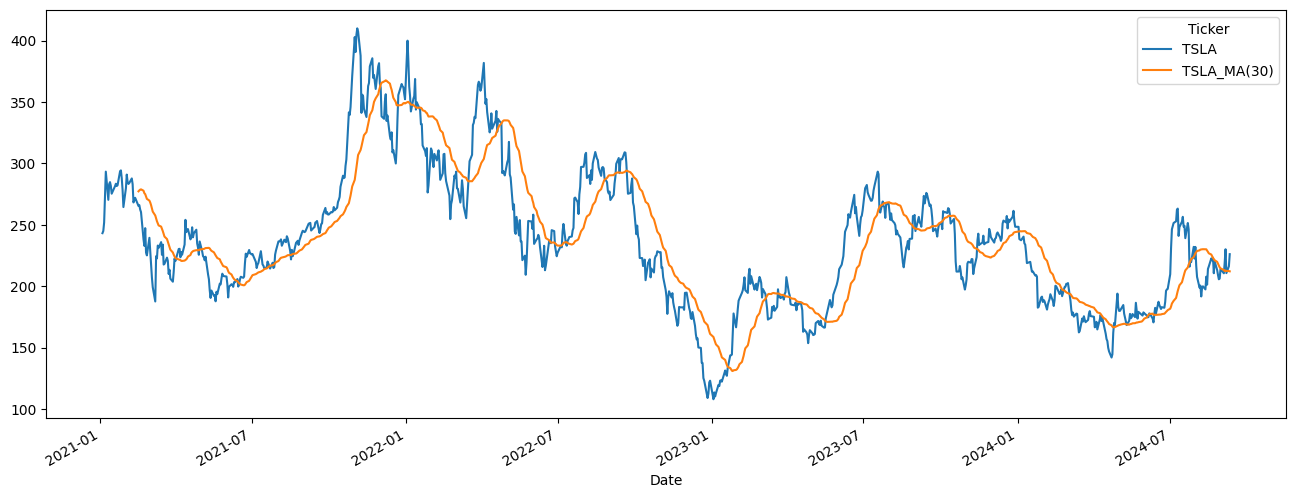

In [59]:
df[['TSLA', 'TSLA_MA(30)']].plot(figsize=(16,6))

plt.show()

Let's construct an expanding averages for AAPL!

In [60]:
df['AAPL'].head()

Date
2021-01-04    126.68
2021-01-05    128.25
2021-01-06    123.93
2021-01-07    128.16
2021-01-08    129.27
Name: AAPL, dtype: float64

In [61]:
df['AAPL'].expanding().mean().head()

Date
2021-01-04    126.680000
2021-01-05    127.465000
2021-01-06    126.286667
2021-01-07    126.755000
2021-01-08    127.258000
Name: AAPL, dtype: float64

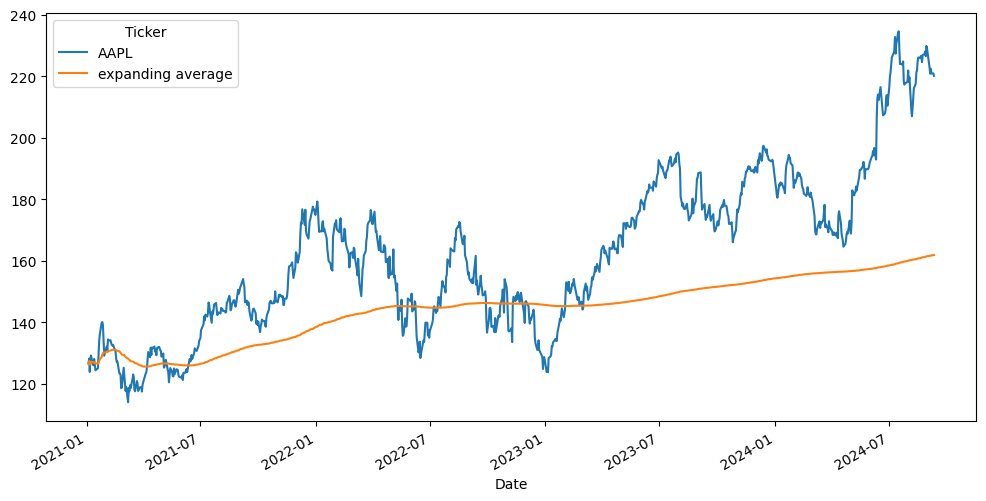

In [62]:
df['expanding average']=df['AAPL'].expanding().mean()
df[['AAPL','expanding average']].plot(figsize=(12,6))

plt.show()